# Recommendation System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### The Data

In [2]:
from ipywidgets import interact, IntSlider
from IPython.display import display

def freeze_header(df, num_rows=30, num_columns=10, step_rows=1, step_columns=1):
    @interact(last_row=IntSlider(min=min(num_rows, df.shape[0]),
                                 max=df.shape[0],
                                 step=step_rows,
                                 description='Rows',
                                 readout=False,
                                 disabled=False,
                                 continuous_update=True,
                                 orientation='horizontal',
                                 slider_color='purple'),
              last_column=IntSlider(min=min(num_columns, df.shape[1]),
                                    max=df.shape[1],
                                    step=step_columns,
                                    description='Columns',
                                    readout=False,
                                    disabled=False,
                                    continuous_update=True,
                                    orientation='horizontal',
                                    slider_color='purple'))
    def _freeze_header(last_row, last_column):
        display(df.iloc[max(0, last_row-num_rows):last_row,
                        max(0, last_column-num_columns):last_column])

In [3]:
data = pd.read_csv('recommendation_data.csv', encoding='latin-1', low_memory=False)

In [4]:
pd.set_option('max_columns', len(data.columns))
freeze_header(df=data, num_rows=10, num_columns=len(data.columns), step_rows=10)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [5]:
def removeNullFeat(data, percent, exception):
    null_percentage = data.isnull().mean(axis=0)
    null_features_removed = [null_percentage.index[i] for i in range(len(null_percentage)) if null_percentage[i] > percent]
    null_features_removed_set = set(null_features_removed)
    
    for feat in exception:
        if feat in null_features_removed_set:
            null_features_removed.remove(feat)
            
    return data.drop(null_features_removed, axis=1)

In [6]:
data = removeNullFeat(data, 0.5, ['Orders.company', 'Products.long_description'])

In [7]:
pd.set_option('max_info_columns', len(data.columns))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 86 columns):
Customers.id                     4194 non-null int64
Customers.fname                  4194 non-null object
Customers.lname                  4194 non-null object
Customers.create_date            4194 non-null int64
Customers.mailing                2114 non-null float64
Customers.last_modified          4194 non-null int64
Customers.customer_type          3771 non-null float64
Orders.id                        4194 non-null int64
Orders.customer_id               4194 non-null int64
Orders.fname                     4194 non-null object
Orders.lname                     4194 non-null object
Orders.company                   728 non-null object
Orders.order_number              4194 non-null object
Orders.currency                  4194 non-null object
Orders.subtotal                  4194 non-null float64
Orders.tax                       3737 non-null float64
Orders.shipping                

In [8]:
data = data[['Customers.id', 
             'Order_Items.product_name', 
             'Order_Items.qty', 
             'Order_Items.price', 
             'Order_Items.cost', 
             'Orders.company',
             'Products.price', 
             'Products.cost',
             'Products.long_description']]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 9 columns):
Customers.id                 4194 non-null int64
Order_Items.product_name     4194 non-null object
Order_Items.qty              4194 non-null int64
Order_Items.price            4194 non-null float64
Order_Items.cost             4191 non-null float64
Orders.company               728 non-null object
Products.price               4036 non-null float64
Products.cost                4037 non-null float64
Products.long_description    4008 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 295.0+ KB


# Exploratory Data Analysis

In [10]:
print('Unique # of customer IDs:', data['Customers.id'].nunique())
print('Unique # of product:', data['Order_Items.product_name'].nunique())
print('Unique # of companies:', data['Orders.company'].nunique())

Unique # of customer IDs: 3054
Unique # of product: 1821
Unique # of companies: 427


### Which customers made the most amount of purchases?

In [11]:
data.groupby('Customers.id').size().sort_values(ascending=False)[:20]

Customers.id
1043    41
1371    35
1616    27
581     25
515     25
851     23
396     18
1420    17
1018    17
403     15
583     13
1776    12
1794    12
304     12
973     11
1730    11
45      10
1352    10
3399    10
2429     9
dtype: int64

### Which products are the most popular?

In [12]:
sns.set_style('whitegrid')
def make_bubble_chart(series, ylabel, num_entries=20, bubble_size=150, text_size=10, figsize=(15, 10)):
    plt.figure(figsize=figsize)
    x = []
    y = []
    color = []
    area = []

    for i in range(num_entries):
        x.append(series.index[i][:16])
        y.append(series[i])
        color.append(series[i]) 
        area.append(series[i] * bubble_size)
        plt.text(series.index[i][:16], 
                 series[i], 
                 series.index[i],
                 size=text_size,
                 horizontalalignment='center')

    # making the scatter plot
    sct = plt.scatter(x, y, c=color, s=area, linewidths=2, edgecolor='w')
    sct.set_alpha(0.55)
    plt.xticks(rotation=45)
    plt.xlabel('Product Name', fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

In [13]:
# Most Selling Product
most_sold_products = data.groupby('Order_Items.product_name').size().sort_values(ascending=False)[:20]
most_sold_products

Order_Items.product_name
Medline MoliCare Super Plus Disposable Adult Diapers - Medium/Large Size                                                               53
Silent Knight Pill Crusher Pouches                                                                                                     48
Medline Emesis/Barf Bags, throw up bags, Blue - 24 Pack                                                                                47
Medline Deluxe Aluminum Transport Chair With Hand Brakes, Red, Wheels Front 8" Back 12", Leightweight Weighs 23 Lbs, Cap. 300 Lbs.     46
K1 Basic Extra-Wide Wheelchairs                                                                                                        36
Medline Emesis/Barf Bags, Blue - 24 Pack                                                                                               28
Capri Plus Bladder Control Pads                                                                                                        27
Padded Sw

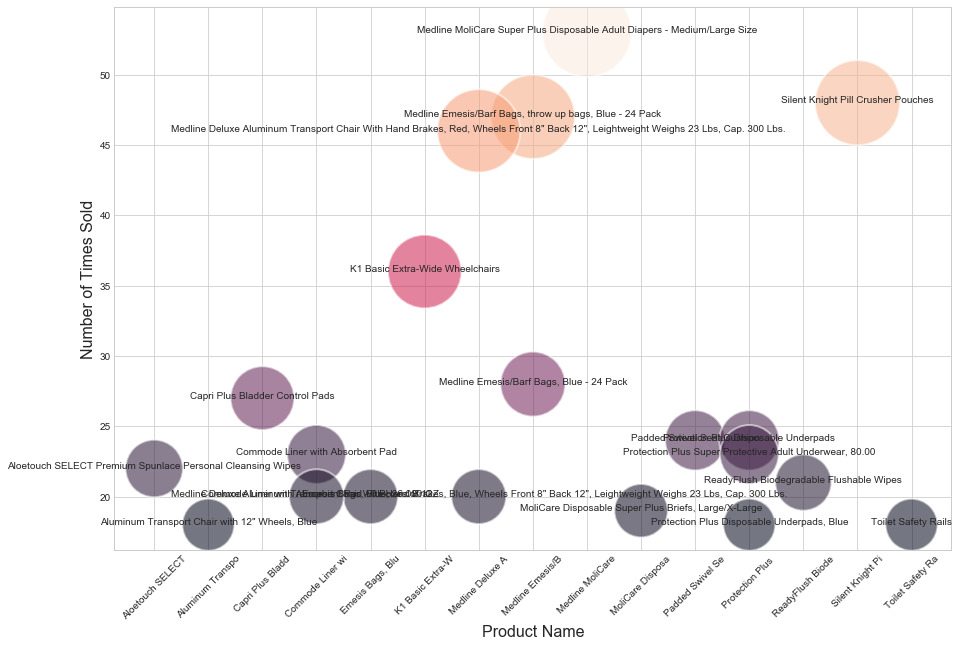

In [14]:
make_bubble_chart(most_sold_products, 'Number of Times Sold')

### Which products are the most popular by total volume?

In [15]:
# Most popular product using maximum sales by volume
most_popular_by_volume = data.groupby('Order_Items.product_name')['Order_Items.qty'].sum().sort_values(ascending=False)[:20]
most_popular_by_volume

Order_Items.product_name
TruTemp                                                                                                                               500
Disposable Emergency Blanket, Gray, Not Applicable                                                                                    305
2-Ply Tissue/Poly Professional Towels, White, Not Applicable                                                                          220
Medline MoliCare Super Plus Disposable Adult Diapers - Medium/Large Size                                                              164
Sanitary Pads with Adhesive & Wings                                                                                                   133
Corrugated Aerosol Tubing                                                                                                             110
Disposable Emergency Blanket, Not Applicable                                                                                           91
Silent Kn

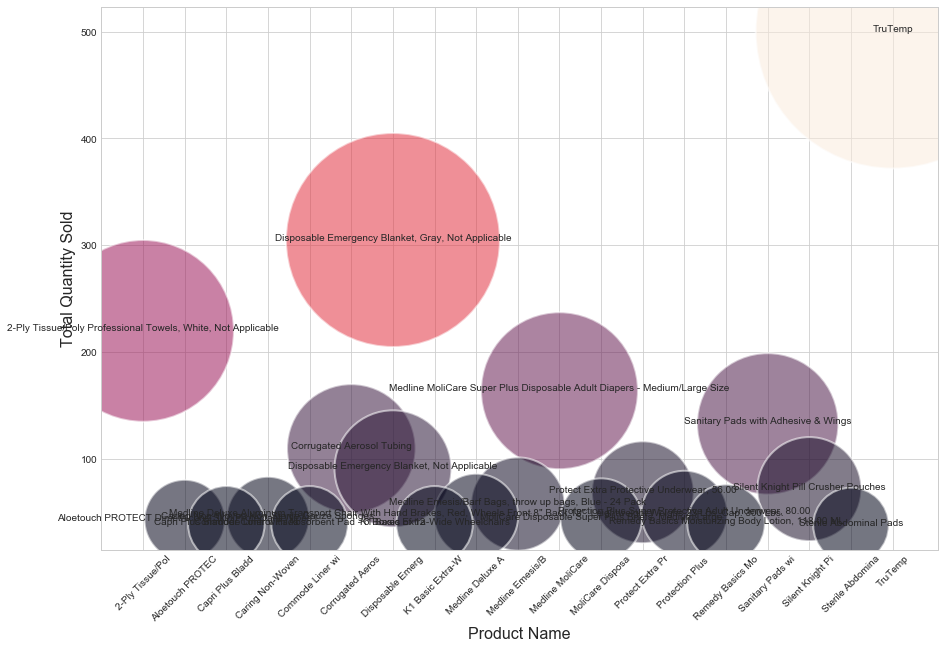

In [16]:
make_bubble_chart(most_popular_by_volume, 'Total Quantity Sold')

### Which products generate the most profit?

In [17]:
data[data['Order_Items.cost'].isnull()][['Order_Items.price', 'Order_Items.cost', 'Products.price', 'Products.cost']]

,Order_Items.price,Order_Items.cost,Products.price,Products.cost
2373,47.82,NaN,47.82,34.65
4023,8.25,NaN,8.25,1.50
4050,44.00,NaN,NaN,NaN


In [18]:
# Most popular product using maximum sales by dollar amount
data.loc[2373, 'Order_Items.cost'] = 34.65
data.loc[4023, 'Order_Items.cost'] = 1.50
data.loc[4050, 'Order_Items.cost'] = 0

In [19]:
data['Order_Items.profit'] = data.apply(lambda x : (x['Order_Items.price'] - x['Order_Items.cost']) * x['Order_Items.qty'], axis=1)

In [20]:
most_profitable = data.groupby('Order_Items.product_name')['Order_Items.profit'].sum().sort_values(ascending=False)[:20]
most_profitable

Order_Items.product_name
Disposable Emergency Blanket, Gray, Not Applicable                                                                                     3275.70
2-Ply Tissue/Poly Professional Towels, White, Not Applicable                                                                           1724.80
Medline MoliCare Super Plus Disposable Adult Diapers - Medium/Large Size                                                               1614.24
Sanitary Pads with Adhesive & Wings                                                                                                    1549.45
Medline Deluxe Aluminum Transport Chair With Hand Brakes, Red, Wheels Front 8" Back 12", Leightweight Weighs 23 Lbs, Cap. 300 Lbs.     1381.54
Silent Knight Pill Crusher Pouches                                                                                                      997.17
Disposable Emergency Blanket, Not Applicable                                                                         

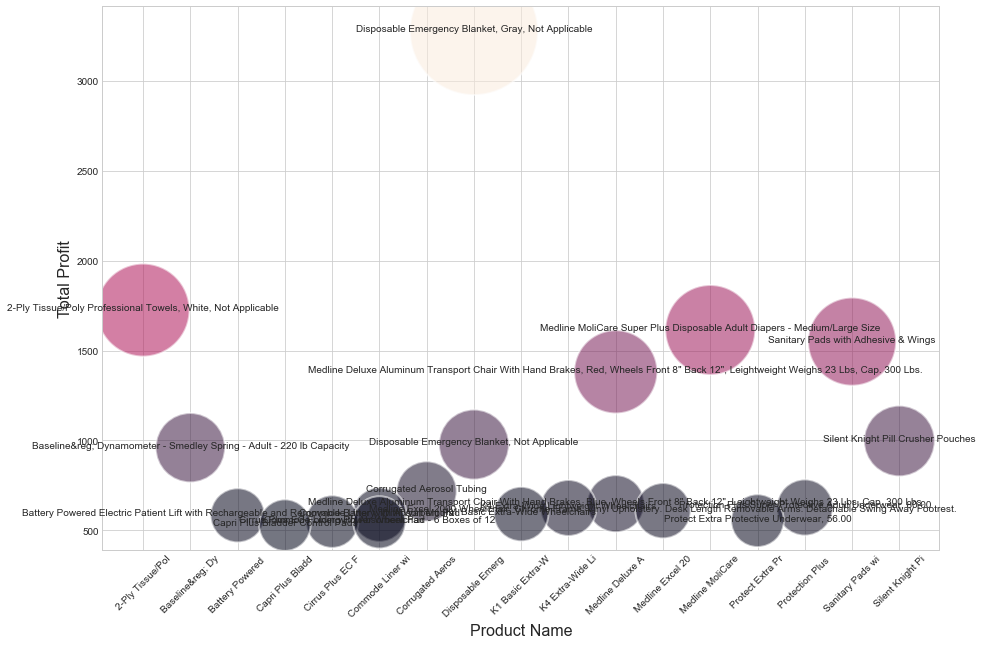

In [21]:
make_bubble_chart(most_profitable, 'Total Profit', bubble_size=5)

### Which company has sold the most products?

In [22]:
companies_with_most_sold = data.groupby(['Orders.company']).size().sort_values(ascending=False)[:20]
companies_with_most_sold

Orders.company
Company145    27
Company130    17
Company59     15
Company52     13
Company171    12
Company86     11
Company159    11
Company6      10
Company264     9
Company165     8
Company57      7
Company10      6
Company73      6
Company89      6
Company54      6
Company48      5
Company173     5
Company291     5
Company300     5
Company139     5
dtype: int64

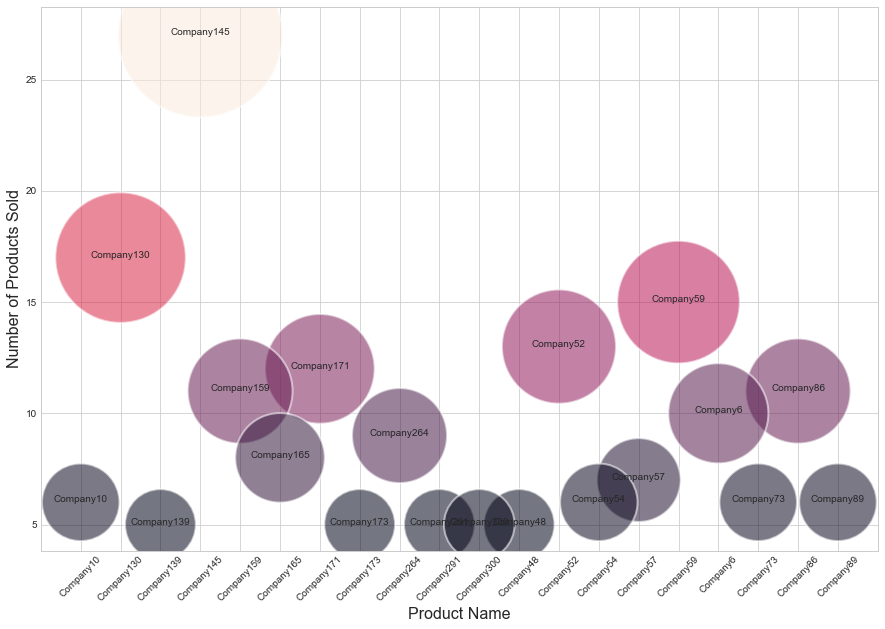

In [23]:
make_bubble_chart(companies_with_most_sold, 'Number of Products Sold', bubble_size=1000)

# Preprocessing the data

In [24]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [25]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [26]:
n_users = data['Customers.id'].nunique()
n_items = data['Order_Items.product_name'].nunique()

sparsity = 1 - float(data.shape[0]) / float(n_users*n_items) * 100
sparsity

0.9245864391529083

In [27]:
train_data_matrix = train_data.pivot_table(index='Customers.id', 
                                           columns='Order_Items.product_name', 
                                           values='Order_Items.qty', 
                                           fill_value=0)
test_data_matrix = test_data.pivot_table(index='Customers.id', 
                                           columns='Order_Items.product_name', 
                                           values='Order_Items.qty', 
                                           fill_value=0)

In [28]:
train_data_matrix.head()

Order_Items.product_name,"BUCKET, REPLACEMENT FOR MDS89668XW",1 Box Of Medline Commode Liners with Absorbent Pad,1 Pad of CURAD Mediplast Wart Pad,"1-Ply Blockade AngelStat Surgical Gowns, Ceil Blue, Extra Large","1/2"" self-adhesive hook material, 25 yard dispenser box, white","100% Cotton Unisex Reversible Hyperbaric Scrub Tops, Misty Green, MZS","100% Cotton Unisex Reversible Tops, Ceil Blue, MHS",10215-s,12112-3,12124-3,"18"" Hamper Stands, Standard","19"" Flyweight Lightweight Blue Transport Wheelchair","2"" self-adhesive loop material, 10 yard dispenser box, tan","2"" self-adhesive loop material, 25 yard dispenser box, tan","2-Ply Tissue/Poly Professional Towels, White, Not Applicable",2000 Extra-Wide Wheelchairs,"24 Hour Urine Collection Bottle, 3000.0 ML","3 Pack, Hospital Receiving Blankets, Baby Blankets, 100% Cotton, 30x40, Elephant",3 Wheel Flame Blue Rollator Walker with Basket Tray and Pouch,3 Wheel Flame Red Rollator Walker with Basket Tray and Pouch,"3 Wheel Walker Rollator with Basket Tray and Pouch, Flame Blue","3 Wheel Walker Rollator with Basket Tray and Pouch, Flame Red","3"" Wheels For Walkers","3/4"" Guardian Utility Tips, Gray","4-Panel Abdominal Binders, 2X-Large","4-Panel Abdominal Binders, Large/X-Large","5"" Wheels For Walkers","6 Cylinder Oxygen Carrier, M9 Cylinders",6' CPAP Tube,6-spring hand grip (each),"8"" Rear Walker Wheel Attachment","A&D Ointment by H & H Laboratories Inc, 384.00 ML",Accu-Therm Hot/Cold Gel Packs,Accu-Therm Non-Insulated Hot Pack,"Accutouch Chemo Nitrile Exam Gloves, Blue, Medium","Active Liquid Protein Nutritional Supplement, 0.0","Active Liquid Protein Nutritional Supplement, 30.000 OZ",AcuForce&reg; 7.0 Massage Tool,Adaptive Eating Utensils - Adaptive Fork,Addipak Sterile Saline Solution,Adjustable Angle Rotating Suction Cup Grab Bar,Adjustable Height Bathtub Grab Bar Safety Rail,Adjustable Height Home Bed Assist Handle,"Adjustable Height Teak Bath Bench Stool, Rectangular",Adjustable Height Triangular Teak Bath Bench Stool,"Adjustable Lightweight Folding Cane with Gel Hand Grip, Black","Adjustable Lightweight Folding Cane with Gel Hand Grip, Blue Crackle","Adjustable Lightweight Folding Cane with Gel Hand Grip, Red Crackle",Adult Bariatric Crutches,"AdvanTrode&reg; Elite Electrode, 2"" round, tan tricot, 40/box",Advantage Magnetic Patient Alarms,Advantage Select SE Mattresses,Advantage Therapeutic Homecare Foam Mattress,Aeroflow II Wheelchair Cushions,Aeroflow Static Air Overlay,Aeromist Plus Nebulizer Compressor with Disposable Nebulizer Kit,Airone Alternating Pressure Pads,All Weather Premium Quality Shopping Utility Bag - Green,"Aloetouch 3G Powder-Free Latex-Free Synthetic Exam Gloves, Large","Aloetouch 3G Powder-Free Latex-Free Synthetic Exam Gloves, Medium","Aloetouch 3G Powder-Free Latex-Free Synthetic Exam Gloves, Small","Aloetouch 3G Powder-Free Latex-Free Synthetic Exam Gloves, X-Large","Aloetouch Extended Cuff Chemo Nitrile Exam Gloves, Green, Medium","Aloetouch Extended Cuff Chemo Nitrile Exam Gloves, Green, X-Large",Aloetouch PROTECT Dimethicone Skin Protectant Wipes,Aloetouch Personal Cleansing Wipes,"Aloetouch Powder-Free Latex Exam Gloves, Green, X-Small",Aloetouch SELECT Premium Spunlace Personal Cleansing Wipes,Aloetouch Sensitive Personal Cleansing Baby Wipes,"Aloetouch Ultra IC Powder-Free Latex-Free Synthetic Exam Gloves, Large","Aloetouch Ultra IC Powder-Free Latex-Free Synthetic Exam Gloves, Medium",Aluminum Bath Benches with Back,"Aluminum Forearm Crutches, Child, 1 Pair","Aluminum Quad Canes, Black","Aluminum Quad Canes, Chrome",Aluminum Rollator with Fold Up and Removable Back Support and Padded Seat,"Aluminum Rollator with Fold Up and Removable Back Support and Padded Seat, Red",Aluminum Shower Commode Wheelchair,"Aluminum Transport Chair with 12"" Wheels, Blue","Aluminum Transport Chair with 12"" Wheels, Blue, F: 8 R: 12","Aluminum Transport Chair with 12"" Wheels, Red","Aluminum Transport Chair with 12"" Wheels, Red, F: 8 R: 12","Aluminum Tr

In [29]:
#user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
#item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

## SVD

In [30]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return np.sqrt(mean_squared_error(prediction, ground_truth))

In [31]:
train_data_matrix_mean = np.mean(train_data_matrix.as_matrix(), axis=1).reshape(-1, 1)
train_data_matrix_sparse = sp.csr_matrix(train_data_matrix, dtype='float')

In [32]:
u, s, vt = svds(train_data_matrix_sparse, k=50)
s_diag_matrix = np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt) + train_data_matrix_mean
print('User-based CF RMSE: ' + str(rmse(X_pred, test_data_matrix.as_matrix())))

User-based CF RMSE: 2.81418991892


In [33]:
df = pd.DataFrame(X_pred, columns=train_data_matrix.columns, index=train_data_matrix.index)

In [34]:
data[data['Customers.id'] == 100]['Order_Items.product_name']

101            Remedy Olivamine Skin Repair Cream, Amber
102            Remedy Olivamine Skin Repair Cream, Amber
103    Remedy Olivamine Skin Repair Cream, Amber, 946...
Name: Order_Items.product_name, dtype: object

In [35]:
df.loc[100].sort_values(ascending=False)[:20]

Order_Items.product_name
Insulated Carafes, Clear W/Blue Lid, 32.000 OZ                              0.004378
Commode Liner with Absorbent Pad - 6 Boxes of 12                            0.004378
Men's ResiStat Protective Lab Coat, White, Medium                           0.004378
Ladies' Resistat Lab Coats, White, White                                    0.004378
CanDo&reg; Foam Roller - White PE foam - 6" x 36" - Round                   0.004378
Medline MoliCare Super Plus Disposable Adult Diapers - Medium/Large Size    0.004378
Protection Plus Super Protective Adult Underwear, 2X-Large                  0.004378
Comfort Glide Repositioning Sheet, Blue                                     0.004378
Disposable Emergency Blanket, Not Applicable                                0.004378
Supreme Urinals, Clear                                                      0.004378
Men's ResiStat Protective Lab Coat, White, Large                            0.004378
Aloetouch Sensitive Personal Cleansing B

# Alternating Least Squares

In [36]:
import implicit

In [37]:
data_matrix = data.pivot_table(index='Customers.id', 
                               columns='Order_Items.product_name', 
                               values='Order_Items.qty', 
                               fill_value=0)

In [38]:
user_map = {ind: i for i, ind in enumerate(data_matrix.index)}
item_map = {i: col for i, col in enumerate(data_matrix.columns)}

In [39]:
# initialize a model
model = implicit.als.AlternatingLeastSquares(factors=150)

# train the model on a sparse matrix of item/user/confidence weights
item_users = sp.csr_matrix(data_matrix).T
model.fit(item_users=item_users)

# recommend items for a user
user_items = train_data_matrix_sparse
recommendations = model.recommend(userid=user_map[100], user_items=user_items)

# find related items
related_items = model.similar_items(itemid=30)

100%|██████████| 15.0/15 [00:00<00:00, 17.90it/s]


In [40]:
data[data['Customers.id'] == 100]['Order_Items.product_name']

101            Remedy Olivamine Skin Repair Cream, Amber
102            Remedy Olivamine Skin Repair Cream, Amber
103    Remedy Olivamine Skin Repair Cream, Amber, 946...
Name: Order_Items.product_name, dtype: object

In [41]:
user_map[100]

60

In [42]:
for tup in recommendations:
    print(item_map[tup[0]])

Remedy Olivamine Skin Repair Cream, Amber
Remedy Olivamine Skin Repair Cream, Amber, 946.00 ML
Ionto+ Plus Hi-Per Iontophoresis electrodes - butterfly, pack of 12
MediGuard Synthetic Exam Gloves, Medium
Soothe & Cool Moisturizing Body Lotion, White, 118.29 ML
Guardian 7/8" Super Crutch Tip, Gray
IOMED&reg; disposable electrodes - OptimA, small 1.5cc, pack of 12
Medline Sterile Bordered Gauze
IOMED&reg; iontophoresis dose controller - 2-channel unit
Castile Soap Towelettes by PDI Inc


In [43]:
item_map[30]

'6 Cylinder Oxygen Carrier, M9 Cylinders'

In [44]:
for rel_item in related_items:
    print(item_map[rel_item[0]])

6 Cylinder Oxygen Carrier, M9 Cylinders
CanDo&reg; Foam Roller - White PE foam - 6" x 18" - Half-Round
Home Bed Assist Grab Rail with Bed Board
Spine Brace Flex Power Plus Lumbar Orthosis, Black, Large
Aloetouch Powder-Free Latex Exam Gloves, Green, X-Small
Soothe & Cool Moisture Barrier Ointment, 56.00 ML
Walker Rollator with 6" Wheels, Fold Up Removable Back Support and Padded Seat, Blue
Medline Excel K4 Leightweight Wheelchair, Black Powder Coat Frame, Nylon Upholstery, Weighs 31 lbs. Swing Back Desk Length Removable Arms. Detachable Swing Away Footrest.
Adjustable Height Teak Bath Bench Stool, Triangular
19" Flyweight Lightweight Blue Transport Wheelchair
